In [1]:
#Import the necessaries libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
import yfinance as yahoofinance
import numpy as np
from timeit import default_timer as timer
from datetime import datetime

In [20]:
#Gettting 1 year of historical data
stock = input()
data_1 = yahoofinance.download(stock)
ticker_1 = yahoofinance.Ticker(stock)
data_1 = ticker_1.history(period='1y')

GOLD
[*********************100%%**********************]  1 of 1 completed


In [21]:
data_1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-02 00:00:00-04:00,14.779768,14.886727,13.885203,13.943544,33435600,0.0,0.0
2022-11-03 00:00:00-04:00,13.875481,13.875481,12.650315,12.737827,58799000,0.0,0.0
2022-11-04 00:00:00-04:00,13.321237,13.846308,13.194831,13.807414,37912500,0.0,0.0
2022-11-07 00:00:00-05:00,13.894928,14.176910,13.787970,14.167187,22287500,0.0,0.0
2022-11-08 00:00:00-05:00,14.215803,15.363180,14.147739,15.178432,37409600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,16.230000,16.420000,15.840000,16.330000,25548500,0.0,0.0
2023-10-30 00:00:00-04:00,16.299999,16.360001,16.080000,16.110001,17416300,0.0,0.0
2023-10-31 00:00:00-04:00,16.080000,16.270000,15.860000,15.980000,17720900,0.0,0.0


In [22]:
returns = data_1.Close - data_1.Close.shift(1)

In [23]:
#Getting stock returns and the amount of trials
stock_returns = np.log(data_1.Close/data_1.Close.shift(1))
mean = stock_returns.mean()
stdev = stock_returns.std()
last_price = data_1.Close[-1]
trials = 1000

In [25]:
stock_mean = data_1.Close.mean()
stock_stdev = data_1.Close.std()

In [26]:
stock_returns.describe()

count    251.000000
mean       0.000564
std        0.020846
min       -0.090441
25%       -0.010899
50%        0.000000
75%        0.010793
max        0.080630
Name: Close, dtype: float64

In [27]:
stock_stdev

1.4017364867593742

In [28]:
#A simple simulation
random = np.random.normal(mean,stdev,252)
pred_price = last_price*(1+random).cumprod()

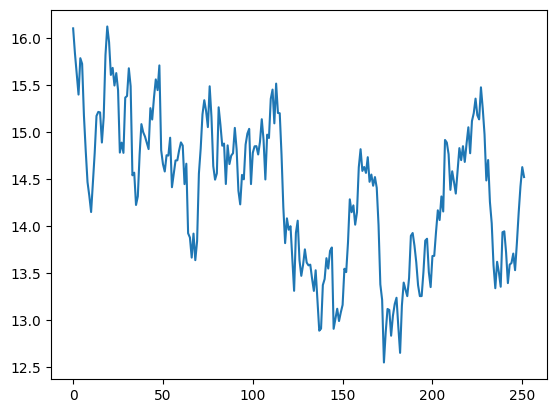

In [29]:
plt.plot(pred_price)

In [30]:
#Identifying the top and bottom 5th percentile to get the best case scenario and worst case scenario
fitfh_percentile = -1.645
top_fifth = 1.645

11.068595499993535


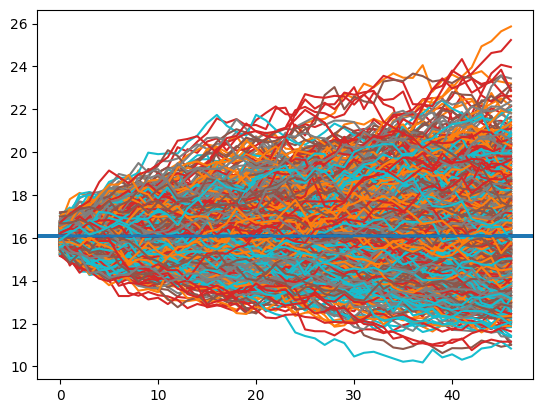

In [31]:
#Creating the monte carlo simulation
prices = []
probability = []
outcome = []
values = []
start = timer()

for x in range(trials):
    simulation_repetions = np.random.normal(mean,stdev,47)
    simulated_prices = last_price * (simulation_repetions + 1).cumprod()
    random_mean = simulated_prices.mean()
    random_stdev = simulated_prices.std()
    plt.axhline(last_price)
    plt.plot(last_price)
    plt.plot(simulated_prices)
    #plt.axhline(call_price, color="green")
    #plt.axhline(put_price, color="red")
    prices.append(simulated_prices)
    worst_fifth = (fitfh_percentile * random_stdev) + random_mean
    best_fifth = (top_fifth * random_stdev) + random_mean
    probability.append(worst_fifth)
    outcome.append(best_fifth)
    values.append(simulated_prices)
end = timer()
print(end - start)

In [32]:
database = pd.DataFrame(values).T
database

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,15.732903,16.093730,15.455552,15.831684,16.023012,15.757164,15.776425,16.228265,15.745748,16.405883,...,16.465973,16.239419,16.985171,16.564585,16.218975,15.794652,16.208309,16.670604,16.066084,15.890581
1,16.010483,16.343185,15.159302,15.380531,16.400084,15.304886,16.006124,16.210212,16.084767,17.259210,...,16.738634,16.433710,17.045144,16.757540,16.307755,15.792948,16.434264,16.696177,15.419845,16.226975
2,16.347266,16.329153,15.096727,15.976998,16.468321,15.199633,15.512186,16.733152,16.468567,16.643267,...,16.862419,16.999941,17.345883,16.655208,16.370035,15.625953,16.375041,16.854048,15.199723,16.499038
3,16.655668,15.969896,14.990222,15.881908,16.589118,14.791284,15.247835,17.026268,16.874366,16.468400,...,16.377826,16.638943,17.441964,16.045757,16.806691,16.041162,16.717167,16.664693,14.355520,16.157790
4,16.654832,15.416286,14.975386,15.590271,16.661346,14.595334,15.456098,16.974608,17.091866,16.455791,...,16.250371,16.803996,17.301518,16.523955,16.567734,15.724139,16.463111,16.089558,14.416348,16.295389
5,16.906255,15.222518,14.745222,15.755896,16.670991,14.850856,15.372407,17.629327,17.405331,16.217320,...,16.443944,16.827240,17.732286,16.342355,16.428259,15.563541,15.936148,16.509159,14.127617,16.510695
6,16.732821,15.170574,14.829548,15.264771,16.739102,15.258435,15.590942,17.986818,17.022848,15.892786,...,16.187701,16.632956,17.198981,15.801614,16.664649,15.319547,15.151252,16.014220,14.258675,16.786464
7,17.140677,15.645810,15.185893,15.487034,16.991819,15.524074,16.167221,17.782528,16.761745,15.870246,...,16.834062,16.062777,17.173737,15.803849,16.481154,14.904124,14.562890,15.862226,14.276195,16.592700
8,17.689073,16.103209,15.080796,14.757021,17.579350,14.918453,15.680823,17.715776,16.977448,15.864849,...,17.335340,16.042751,17.575325,16.024765,15.592565,15.324341,14.571147,15.535443,14.629210,16.886071
9,17.719664,15.944970,15.176972,14.961678,17.167678,14.943462,15.581233,17.693554,17.573955,16.821100,...,17.461871,16.048859,17.157355,16.246874,15.251502,15.783859,14.536888,15.087384,14.670043,16.905112


(array([  2.,   7.,  23.,  56.,  92., 198., 291., 251.,  69.,  11.]),
 array([ 9.49044446, 10.34831106, 11.20617765, 12.06404424, 12.92191083,
        13.77977743, 14.63764402, 15.49551061, 16.3533772 , 17.21124379,
        18.06911039]),
 <BarContainer object of 10 artists>)

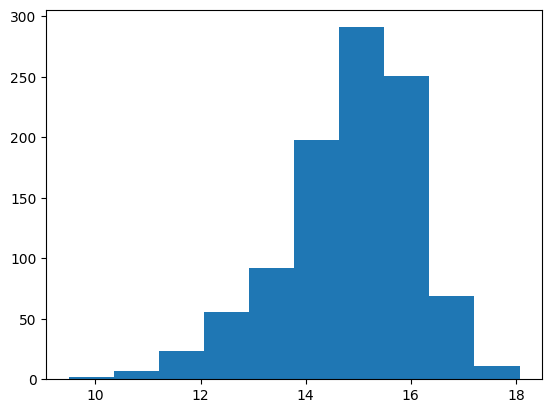

In [33]:
plt.hist(probability)

(array([ 31., 222., 289., 203., 109.,  66.,  53.,  16.,   4.,   7.]),
 array([14.43309615, 15.47748114, 16.52186614, 17.56625113, 18.61063613,
        19.65502112, 20.69940611, 21.74379111, 22.7881761 , 23.8325611 ,
        24.87694609]),
 <BarContainer object of 10 artists>)

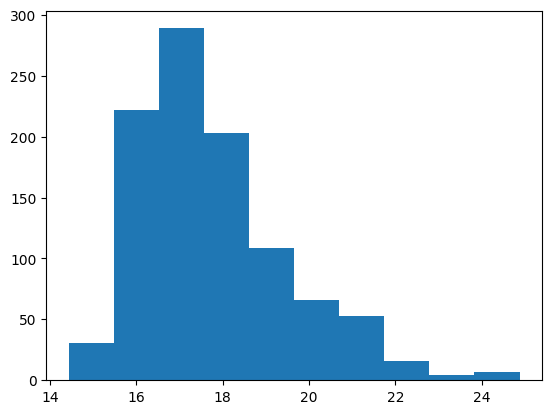

In [34]:
plt.hist(outcome)

In [35]:
probability_list = pd.DataFrame(probability)
probability_list.mean()

0    14.829616
dtype: float64

In [36]:
outcome_list = pd.DataFrame(outcome)
outcome_list.mean()

0    17.782339
dtype: float64

In [ ]:
#Getting the returns probability from the monte carlo simulation
returns_probability = []
start = timer()

for x in range(trials):
    simulation_repetions = np.random.normal(mean,stdev,252)
    simulated_returns = simulation_repetions
    simulated_mean = simulated_returns.mean()
    simulated_stdev = simulated_returns.std()
    #plt.axhline(0)
    #plt.plot(0)
    #plt.plot(simulated_returns)
    plt.hist(simulated_returns, bins=10)
    plt.axvline(0, color='black')
    plt.axvline((fitfh_percentile * simulated_stdev) + simulated_mean, color='black')
    worst_case = (fitfh_percentile * simulated_stdev) + simulated_mean
    returns_probability.append(worst_case)
end = timer()
print(end - start)

55.91252529999474
